In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['column_2C_weka.csv', 'column_3C_weka.csv']


In [33]:
# read csv data
data = pd.read_csv("../input/column_2C_weka.csv")

In [4]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


# A. SUPERVISED LEARNING

* Supervised learning: It uses data that has labels. Example, there are orthopedic patients data that have labels normal and abnormal.
    * There are features(predictor variable) and target variable. Features are like pelvic radius or sacral slope(If you have no idea what these are like me, you can look images in google like what I did :) )Target variables are labels normal and abnormal
    * Aim is that as given features(input) predict whether target variable(output) is normal or abnormal
    * Classification: target variable consists of categories like normal or abnormal
    * Regression: target variable is continious like stock market
    * If these explanations are not enough for you, just google them. However, be careful about terminology: features = predictor variable = independent variable = columns = inputs. target variable = responce variable = class = dependent variable = output = result

**Data Analysis**

In [6]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


Abnormal    210
Normal      100
Name: class, dtype: int64

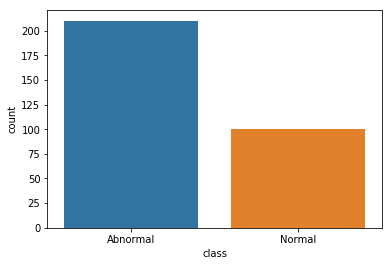

In [8]:
sns.countplot(x="class", data=data)
data.loc[:,'class'].value_counts()

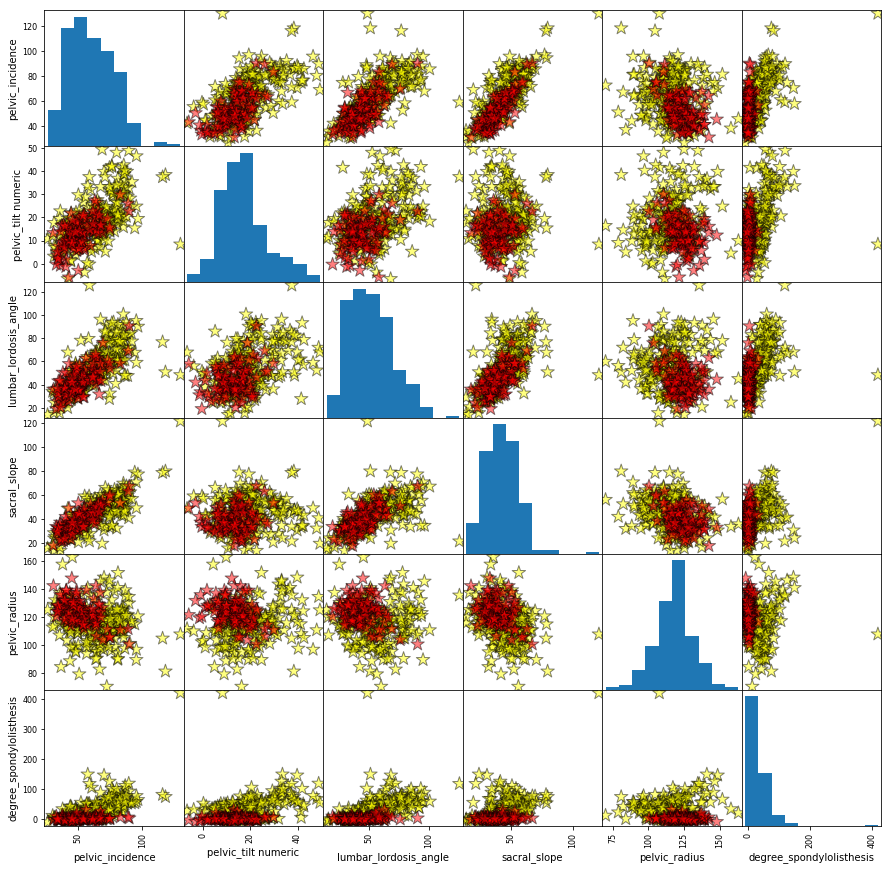

In [10]:
color_list = ['yellow' if i=='Abnormal' else 'red' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

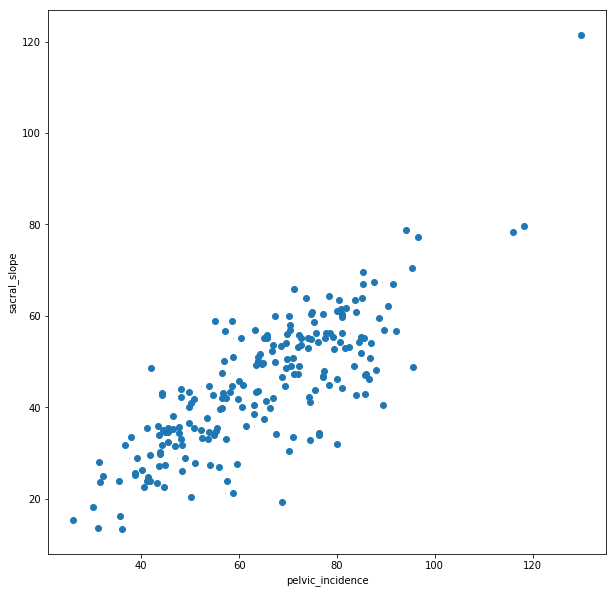

In [11]:
datax = data[data['class'] =='Abnormal']
x = np.array(datax.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(datax.loc[:,'sacral_slope']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

**Linear Regression**

* y = ax + b where y = target, x = feature and a = parameter of model
* We choose parameter of model(a) according to minimum error function that is lost function
* In linear regression we use Ordinary Least Square (OLS) as lost function.
* OLS: sum all residuals but some positive and negative residuals can cancel each other so we sum of square of residuals. It is called OLS
* Score: Score uses R^2 method that is ((y_pred - y_mean)^2 )/(y_actual - y_mean)^2

R^2 score:  0.6458410481075871


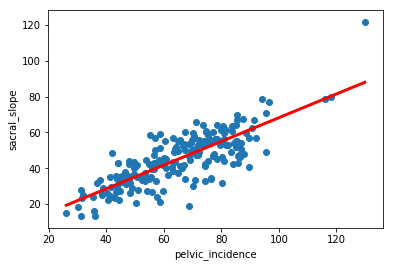

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space
predict_ = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter
plt.plot(predict_, predicted, color='red', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

**K-NEAREST NEIGHBORS (KNN)**

* KNN: Look at the K closest labeled data points
* Classification method.
* First we need to train our data. Train = fit
* fit(): fits the data, train the data.
* predict(): predicts the data 
* If you do not understand what is KNN, look at youtube there are videos like 4-5 minutes. You can understand better with it. 
* Lets learn how to implement it with sklearn

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knnDt = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knnDt.fit(x,y)
prediction = knnDt.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

In [17]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knnDt = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knnDt.fit(x_train,y_train)
prediction = knnDt.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knnDt.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.8602150537634409


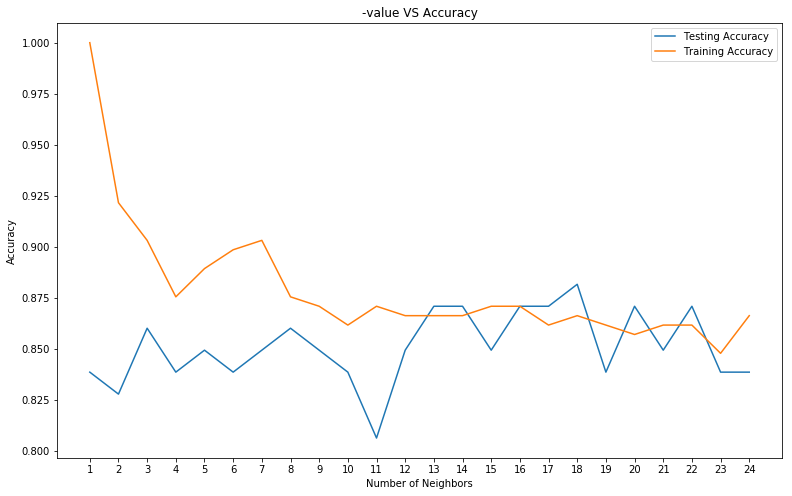

Best accuracy is 0.8817204301075269 with K = 18


In [19]:
neigBr = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neigBr):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neigBr, test_accuracy, label = 'Testing Accuracy')
plt.plot(neigBr, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neigBr)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))


**UNSUPERVISED LEARNING**
**KMEANS**

* Unsupervised learning: It uses data that has unlabeled and uncover hidden patterns from unlabeled data. Example, there are orthopedic patients data that do not have labels. You do not know which orthopedic patient is normal or abnormal.


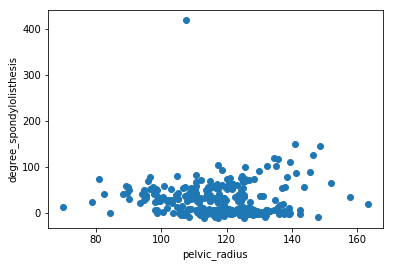

In [20]:
data2 = pd.read_csv('../input/column_2C_weka.csv')
plt.scatter(data2['pelvic_radius'],data2['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

# KMeans Clustering


* KMeans Cluster: The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity
* KMeans(n_clusters = 2): n_clusters = 2 means that create 2 cluster

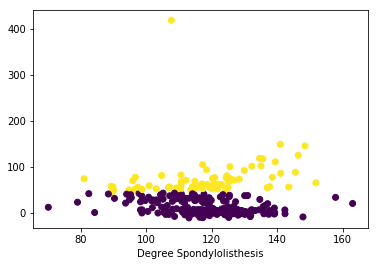

In [22]:
data2_ = data2.loc[:,['degree_spondylolisthesis','pelvic_radius']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2_)
labels = kmeans.predict(data2_)
plt.scatter(data2['pelvic_radius'],data['degree_spondylolisthesis'],c = labels)
plt.xlabel('pelvic_radius')
plt.xlabel('Degree Spondylolisthesis')
plt.show()

**EVALUATING OF CLUSTERING**

* There are two clusters that are 0 and 1
* First class 0 includes 138 abnormal and 100 normal patients
* Second class 1 includes 72 abnormal and 0 normal patiens *The majority of two clusters are abnormal patients.

In [25]:
dataFrame = pd.DataFrame({'labels':labels,"class":data2['class']})
crossTab = pd.crosstab(dataFrame['labels'],dataFrame['class'])
print(crossTab)

class   Abnormal  Normal
labels                  
0            138     100
1             72       0


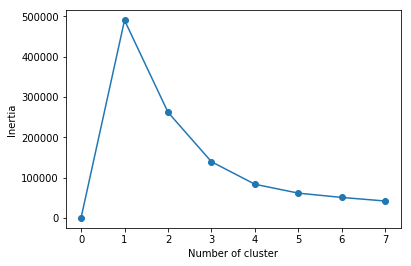

In [27]:
# inertia
inertia_list = np.empty(8)
for i in range(1,8):
    kMeans = KMeans(n_clusters=i)
    kMeans.fit(data2_)
    inertia_list[i] = kMeans.inertia_
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

**STANDARDIZATION**

* Standardizaton is important for both supervised and unsupervised learning
* Do not forget standardization as pre-processing
* As we already have visualized data so you got the idea. Now we can use all features for clustering.
* We can use pipeline like supervised learning

In [28]:
data_ = pd.read_csv('../input/column_2C_weka.csv')
data3_ = data.drop('class',axis = 1)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kMeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar,kMeans)
pipe.fit(data3_)
labels = pipe.predict(data3_)
df = pd.DataFrame({'labels':labels,"class":data_['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0             94      90
1            116      10


**HIERARCHY**

* vertical lines are clusters
* height on dendogram: distance between merging cluster
* method= 'single' : closest points of clusters

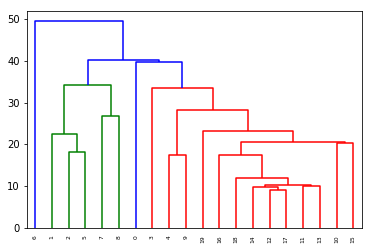

In [32]:
from scipy.cluster.hierarchy import linkage,dendrogram

merging = linkage(data3_.iloc[200:220,:],method = 'single')
dendrogram(merging, leaf_rotation = 90, leaf_font_size = 6)
plt.show()